In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/design_lab/

/content/drive/MyDrive/design_lab


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
rx_data = pd.read_csv('OOK_rx_data.csv')
column = []
for i in range(0,512):
  column.append("column #{}".format(i+1))
rx_data.columns = column
print(len(rx_data))
rx_data.head()

39000


,column #1,column #2,column #3,column #4,column #5,column #6,column #7,column #8,column #9,column #10,...,column #503,column #504,column #505,column #506,column #507,column #508,column #509,column #510,column #511,column #512
0,0.011762,0.017573,0.005295,0.003670,-0.000911,0.012518,0.004868,0.010825,0.004837,-0.001861,...,-0.001224,0.006594,0.005051,0.011162,0.008994,0.013921,0.006607,-0.003100,0.019360,0.007070
1,0.014433,0.009893,-0.002636,0.004490,0.012676,0.009384,0.002691,-0.002062,0.000729,-0.000533,...,0.001825,0.017155,0.004683,-0.002123,0.012454,0.022536,0.004251,-0.001792,0.002818,0.014904
2,-0.002203,0.004304,-0.002167,-0.000022,-0.004415,-0.002640,0.007933,0.023642,0.021970,0.018397,...,0.014583,0.010935,0.002738,0.004617,0.012897,0.009061,0.014389,0.019500,0.017932,0.019471
3,0.013119,0.009051,0.017413,0.021497,0.011239,0.011628,0.016123,0.013480,0.017927,0.006823,...,0.022507,0.004713,-0.001422,0.009819,0.018007,0.003946,0.019161,0.003096,-0.002994,0.018737
4,0.013252,0.023965,0.007160,0.010313,0.020467,0.014363,0.015693,0.006030,-0.000855,-0.002186,...,-0.003839,0.005674,-0.003932,0.004793,-0.006566,0.006015,0.009583,0.020400,0.006870,0.013827


In [ ]:
correct_data = pd.read_csv('OOK_correct_data.csv')
column = []
for i in range(0,512):
  column.append("column #{}".format(i+1))
correct_data.columns = column
print(len(correct_data))
correct_data.head()

39000


,column #1,column #2,column #3,column #4,column #5,column #6,column #7,column #8,column #9,column #10,...,column #503,column #504,column #505,column #506,column #507,column #508,column #509,column #510,column #511,column #512
0,1,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
2,0,0,0,0,0,0,1,1,1,1,...,1,1,0,0,1,0,1,1,1,1
3,1,0,1,1,0,1,1,1,1,0,...,1,0,0,1,1,0,1,0,0,1
4,1,1,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1


In [ ]:
snr_data = pd.read_csv('OOK_snr_data.csv')
snr_data

,snr_data
0,5
1,5
2,5
3,5
4,5
...,...
38995,30
38996,30
38997,30
38998,30


In [ ]:
def one_hot_encode(y):
  curr = []

  for i in range(0,len(y)):
    if y[i] == 0:
      curr.append([1, 0])
    else:
      curr.append([0, 1])

  return curr

X_test,X_train,Y_test,Y_train,snr_test, snr_train = [],[],[],[],[], []

for i, row in rx_data.iterrows():
  row = row.values
  if i % 10 == 8:
    X_test.append(row)
  else:
    X_train.append(row)

del rx_data


for i ,row in correct_data.iterrows():
  row = row.values
  row = one_hot_encode(row)
  if i % 10 == 8:
    Y_test.append(row)
  else:
    Y_train.append(row)

del correct_data


for i, row in snr_data.iterrows():
  if i % 10 == 8:
    snr_test.append(row["snr_data"])
  else:
    snr_train.append(row["snr_data"])

del snr_data

print(len(X_test))
print(len(X_train))
print(len(Y_test))
print(len(Y_train))

3900
35100
3900
35100


In [ ]:
X_train = np.array(X_train)
X_train = X_train.reshape(-1, X_train.shape[1], 1)

X_test = np.array(X_test)
X_test = X_test.reshape(-1,  X_test.shape[1], 1)

Y_train = np.array(Y_train)
Y_train = Y_train.reshape(-1, Y_train.shape[1],2)

Y_test = np.array(Y_test)
Y_test = Y_test.reshape(-1, Y_test.shape[1],2)

In [ ]:
def scale(arr):
  maxElement = np.max(arr)
  minElement = np.min(arr)
  meanElement = np.mean(arr)
  newArr = []

  for i in range(len(arr)):
    x = (arr[i]-meanElement)/(maxElement-minElement)
    if (x>1 or x<-1):
      print(arr[i])
    arr[i] = x
  return arr

def scaleData(data):
  
  for i in range(len(data)):
    data[i] = scale(data[i])
  return data


In [ ]:
X_train = scaleData(X_train)
X_test = scaleData(X_test)
X_train

array([[[ 0.07480067],
        [ 0.23079842],
        [-0.09880499],
        ...,
        [-0.3241841 ],
        [ 0.27877194],
        [-0.05117363]],

       [[ 0.17288136],
        [ 0.03842936],
        [-0.33260493],
        ...,
        [-0.30760945],
        [-0.17109973],
        [ 0.18682344]],

       [[-0.30017254],
        [-0.12645863],
        [-0.29920656],
        ...,
        [ 0.27919855],
        [ 0.23733295],
        [ 0.27842345]],

       ...,

       [[ 0.16164168],
        [ 0.1070498 ],
        [ 0.05371992],
        ...,
        [-0.00626033],
        [ 0.16221465],
        [-0.02380605]],

       [[ 0.17881059],
        [ 0.12758622],
        [ 0.07605534],
        ...,
        [ 0.18157145],
        [-0.03393671],
        [-0.24738632]],

       [[-0.25569122],
        [-0.03655978],
        [ 0.23856442],
        ...,
        [ 0.006535  ],
        [ 0.16474222],
        [ 0.33351333]]])

In [ ]:
print(Y_test.shape)
print(X_test.shape)
print(Y_train.shape)
print(X_train.shape)

(3900, 512, 2)
(3900, 512, 1)
(35100, 512, 2)
(35100, 512, 1)


In [ ]:
history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test)
                    )

Epoch 1/10
1097/1097 [==============================] - 56s 39ms/step - loss: 0.4299 - accuracy: 0.8737 - val_loss: 0.2229 - val_accuracy: 0.9818
Epoch 2/10
1097/1097 [==============================] - 43s 39ms/step - loss: 0.1640 - accuracy: 0.9842 - val_loss: 0.1225 - val_accuracy: 0.9855
Epoch 3/10
1097/1097 [==============================] - 43s 39ms/step - loss: 0.1000 - accuracy: 0.9859 - val_loss: 0.0824 - val_accuracy: 0.9862
Epoch 4/10
1097/1097 [==============================] - 43s 39ms/step - loss: 0.0711 - accuracy: 0.9865 - val_loss: 0.0617 - val_accuracy: 0.9869
Epoch 5/10
1097/1097 [==============================] - 43s 39ms/step - loss: 0.0554 - accuracy: 0.9870 - val_loss: 0.0503 - val_accuracy: 0.9872
Epoch 6/10
1097/1097 [==============================] - 43s 39ms/step - loss: 0.0463 - accuracy: 0.9875 - val_loss: 0.0433 - val_accuracy: 0.9876
Epoch 7/10
1097/1097 [==============================] - 43s 39ms/step - loss: 0.0406 - accuracy: 0.9879 - val_loss: 0.0389 -

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(predictions[0])

[[4.3860194e-04 9.9956137e-01]
 [9.9851936e-01 1.4806547e-03]
 [9.9999475e-01 5.2981195e-06]
 ...
 [9.9993753e-01 6.2483370e-05]
 [1.0843164e-05 9.9998915e-01]
 [9.9999201e-01 8.0433592e-06]]


In [ ]:
turb = {3:"Strong", 2:"Moderate",1:"Weak"}
ber_snr_turb = {}
for cn in range(1,4):
  pred_data = dict()
  for i in range(0,1300):
    x = (cn-1)*1300+i
    snr = snr_test[x]
    # print(snr)
    if snr not in pred_data.keys():
      pred_data[snr] = {"error" : 0, "total" : 0}
    error = 0

    
    for j in range(0,len(Y_test[x])):
      if (predictions[x][j][0] > predictions[x][j][1] and Y_test[x][j][0] < Y_test[x][j][1]) or (predictions[x][j][0] < predictions[x][j][1] and Y_test[x][j][0] > Y_test[x][j][1]):
        error+=1
      # if (predictions[i][j] != Y_test[i][j]):
      #   error+=1

    pred_data[snr]["error"] += error
    pred_data[snr]["total"] += len(Y_test[x])
  #if turb[cn] not in ber_snr_turb.keys():
    #ber_snr_turb[turb[cn]] = {}
  ber_snr_turb[turb[cn]] = pred_data
x_data = []
y_data = dict()
for h in ber_snr_turb.keys():
  print(h)
  y_data[h] = []
  for snr in ber_snr_turb[h].keys():
    x_data.append(snr)
    y_data[h].append(ber_snr_turb[h][snr]["error"]/ber_snr_turb[h][snr]["total"])
df = pd.DataFrame(y_data,index = x_data[0:26])
df.to_csv('model3_metadata.csv')

Weak
Moderate
Strong


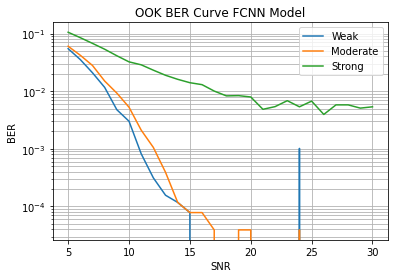

In [ ]:
import matplotlib.pyplot as plot
import numpy as np


plot.grid(True, which="both")
legend = []
for h in y_data.keys():
  plot.semilogy(x_data[:len(y_data[h])],y_data[h])
  legend.append(h)

plot.legend(legend) 
plot.title('OOK BER Curve FCNN Model')
plot.xlabel('SNR')
plot.ylabel('BER')

plot.show()

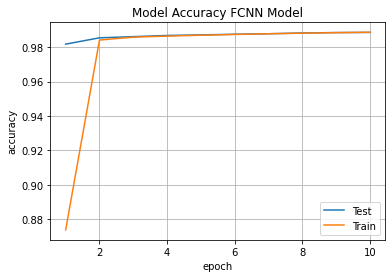

In [ ]:
import matplotlib.pyplot as plot
import numpy as np

eps = 10
plot.grid(True, which="both")
plot.plot(range(1,eps+1),history.history['val_accuracy'])
plot.plot(range(1,eps+1),history.history['accuracy'])
plot.legend(['Test', "Train"])
plot.title('Model Accuracy FCNN Model')
plot.xlabel('epoch')
plot.ylabel('accuracy')

plot.show()

In [ ]:
model.save("model_fcnn.h5")